
# 1.Расчет газонасыщенности пластовой нефти $G_0$
## Газонасыщенность пластовой нефти  $G_0$, $\frac{м^3}{м^3} = \frac{1}{0.00036 ρ_{нд}– 0.2896}$


In [34]:
import math
import numpy as np
%pylab inline

def g0_m3m3(rho_kgm3):
    """
    Расчет газонасыщенности от плотности для нефти
    """
    return np.trunc(1 / (0.00036*rho_kgm3 - 0.2896))

x = 850        
print ('G0=', g0_m3m3(x), 'м^3/м^3') 

Populating the interactive namespace from numpy and matplotlib
G0= 60.0 м^3/м^3


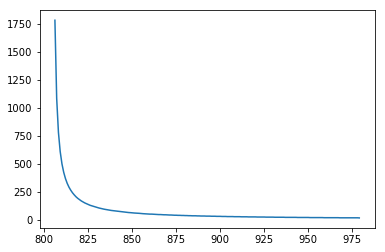

In [43]:
x=np.arange(806,980,1)
y=g0_m3m3(x)
plot(x,y)

# 2.Расчет давления насыщения ${Р_{нас}}$
 для интервала газонасыщенности $25 ≤ Gо ≤ 100$  $\frac{м^3}{м^3}$
 
$ Р_{нас} = 5,5 + 0,093·(Gо – 25) $ МПа

$ Р_{нас} = 6 + 0,22·(Gо – 40) $,справедливое в интервале $ 40 ≤ Gо ≤ 80$  $\frac{м^3}{м^3}$, полученное используя свойства нефтей месторождения Узень

In [46]:
def p_nas_MPa(g0_m3m3):
    if (g0_m3m3 >= 25 and g0_m3m3 < 40) or (g0_m3m3 > 80 and g0_m3m3 <= 100): 
        p=5.5 + 0.093*(g0_m3m3 - 25)
    elif g0_m3m3>=40 and g0_m3m3 <= 80: 
        p= 6 + 0.22*(g0_m3m3 - 40)
    else: 
        print ("Газонасыщенность не подходит")
    return p

print('Рнас=',p_nas_MPa(100),"Мпа")

Рнас= 12.475 Мпа


In [67]:
garr=np.arange(30,100,1)
p=[]
for g in garr:
    p.append(p_nas_MPa(g))
    #print(g,p_nas_MPa(g))

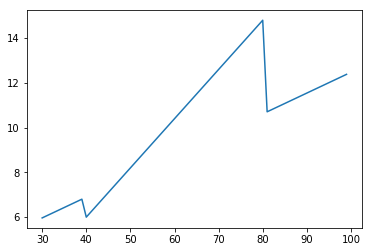

In [68]:
plot(garr,p)


# 3.Расчет объемного коэффициента нефти $b$
## Используется следующая корреляционная зависимость $b = 1 + 0,003·Gо$

In [62]:
b=1+0.003*n
print('b=',b)

NameError: name 'n' is not defined

# 4. Расчет плотности газонасыщенной нефти $ρ_{нг} $
## расчет ведется по следующей корреляционной зависимости при $10 ≤ G_0 ≤ 100$ $\frac{м3}{м3}$ $ρ_{нг}=\frac{1090}{G_0^{0,085}}$

In [7]:
r = math.trunc(1090/(pow(n,0.085)))
print('ρнг=',r,'кг/м^3' )

ρнг= 769 кг/м^3


# 5.Оценка плотности выделяющегося из нефти газа $ρ_г$
## Для этого можно использовать следующую аналитическую зависимость:
## $ρ_г = \frac{685 – 0,809·ρ_{нг}}{Gо}$

In [8]:
ro=math.trunc((685 - 0.809*r) / n)
print('ρг=',ro,'кг/м^3' )

ρг= 1 кг/м^3


# 6.Оценка содержания в выделившемся газе азота $y_а$
## $y_а = 9,9 – 8,167·ρ_г$

In [9]:
ya=math.trunc(9.9-8.167*ro)
print('ya=',ya,'%' )

ya= 1 %


# 7.Оценка содержания в выделившемся газе метана $y_м$
## $y_м = 68,07·(1,977 - ρ_г)$   при  $2 ≤ y_м < 98,5$% $, 0 ≤ y_а < 4$ %

In [10]:
if ya>=0 and ya<=4: ym=math.trunc(68.07*(1.977-ro))
if ym<2 and ym>=98.5: print('Ошибка!')
print('ym=',ym,'%' )

ym= 66 %


# Методология расчета ρнд, используя величины ρнд для разных сроков
## $ρ_{нднач}$ на начало разработки = 840 $\frac{кг}{м^3}$
## $ρ_{ндтек}$ на текущую дату =850 $\frac{кг}{м^3}$
## $P_{наснач}$, начальное давление насыщения = 12 МПа
## $P_{нас}$, давление насыщения года, плотность в котором нужно рассчитать = 10 МПа
## $P_{настек}$, давление насыщения на текущую дату = 8 МПа

In [8]:
ro1 =840
ro3 = 850
P1 =12
P2 =10
P3 =8


## Сначала рассчитывается разность плотностей


In [13]:
dro=ro3-ro1
print('∆ρнд=',dro,'кг/м^3' )

∆ρнд= 10 кг/м^3


## А также разность давлений насыщения

In [9]:
dP=P1-P3
print('∆P=',dP,'МПа' )

∆P= 4 МПа


## Далее находим $\frac{∆ρ_{нд}}{∆Р_{нас}}$


In [15]:
print('∆ρнд/∆Рнас=',dro/dP,'кг/(м^3*МПа)' )

∆ρнд/∆Рнас= 2.5 кг/(м^3*МПа)


## Рассчитываем $∆Р'_{нас}=Р_{наснач}-Р_{нас}$

In [10]:
print('∆P*нас=',P1-P2,'МПа' )

∆P*нас= 2 МПа


## а также $∆ρ'_{нд}=\frac{∆ρ_{нд}}{∆Р_{нас}}·∆Р'_{нас}$


In [17]:
print('∆ρ*нд=',dro/dP*(P1-P2),'кг/м^3' )

∆ρ*нд= 5.0 кг/м^3


## Находим $ρ_{нд}=ρ_{нднач} + ∆ρ'_{нд}$

In [18]:
print('ρнд=',dro/dP*(P1-P2)+ro1,'кг/м^3' )

ρнд= 845.0 кг/м^3
